## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0718 23:38:59.836269  6628 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0718 23:38:59.837270  6628 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 23:38:59.851282  6628 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 23:38:59.852283  6628 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instea

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/step - loss: 6.0268 - acc: 0.2713 - val_loss: 5.8240 - val_acc: 0.3409
Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.7335 - acc: 0.3611 - val_loss: 5.6547 - val_acc: 0.3801
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 5.5843 - acc: 0.3903 - val_loss: 5.5256 - val_acc: 0.4028
Epoch 4/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.4655 - acc: 0.4126 - val_loss: 5.4154 - val_acc: 0.4119
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 5.3576 - acc: 0.4279 - val_loss: 5.3077 - val_acc: 0.4342
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 5.2575 - acc: 0.4406 - val_loss: 5.2211 - val_acc: 0.4426
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 5.1635 - acc: 0.4523 - val_loss: 5.1380 - 

Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8073 - acc: 0.3647 - val_loss: 1.7569 - val_acc: 0.3845
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7239 - acc: 0.3972 - val_loss: 1.6910 - val_acc: 0.4066
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6629 - acc: 0.4155 - val_loss: 1.6511 - val_acc: 0.4141
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.6130 - acc: 0.4359 - val_loss: 1.6156 - val_acc: 0.4312
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5732 - acc: 0.4488 - val_loss: 1.5808 - val_acc: 0.4372
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5388 - acc: 0.4595 - val_loss: 1.5426 - val_acc: 0.4587
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5089 - acc: 0.4694 - val_loss: 1.5272 - val_acc: 0.4571
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 114us/step - loss: 1.7269 - acc: 0.3968 - val_loss: 1.6943 - val_acc: 0.4069
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6693 - acc: 0.4152 - val_loss: 1.6417 - val_acc: 0.4226
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6242 - acc: 0.4306 - val_loss: 1.6209 - val_acc: 0.4214
Epoch 6/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5855 - acc: 0.4461 - val_loss: 1.5710 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5522 - acc: 0.4572 - val_loss: 1.5514 - val_acc: 0.4570
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5240 - acc: 0.4691 - val_loss: 1.5304 - val_acc: 0.4584
Epoch 9/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4964 - acc: 0.4760 - val_loss: 1.5081 - val_acc: 0.4678
Epoch 10/50
50000/50000 [====================

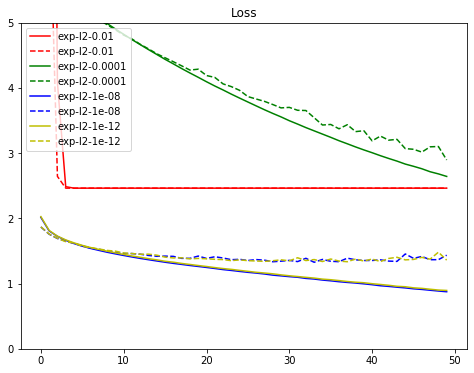

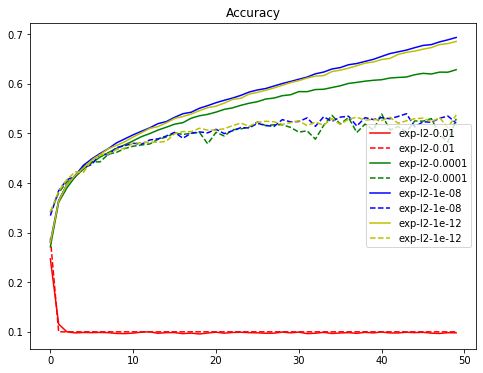

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()